<a href="https://colab.research.google.com/github/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-04-MACHINE-LEARNING-1/blob/master/15-%5BTALLER%5D_Modelos_basados_en_arboles_importancia_de_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-04-MACHINE-LEARNING-1/master/init.py
import init; init.init(force_download=False); 

# Parte 1.

**Bag of words + Bagging**


## Contextualización del problema


Usaremos el dataset Twitter US Airline Sentiment para el problema de clasificación. En el repositorio de Kaggle se encuentra más información en el siguiente [link](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('local/data/Tweets.csv')
# Keeping only the neccessary columns
data = data[['text','airline_sentiment']]

Como es un problema de procesamiento de texto debemos hacer algunas tareas báscias de preprocesamiento:

In [3]:
import re
#Remove neutral class
data = data[data.airline_sentiment != "neutral"]

#text normalization
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x:re.sub('@[^\s]+','',x)))#remove the name of the airline
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
print(f"Número de muestras positivas {np.sum(data['airline_sentiment'].values == 'positive')}")
print(f"Número de muestras negatias {np.sum(data['airline_sentiment'].values == 'negative')}")

Número de muestras positivas 2363
Número de muestras negatias 9178


In [4]:
for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')

In [5]:
data[:10]

,text,airline_sentiment
1,plus youve added commercials to the experienc...,positive
3,its really aggressive to blast obnoxious ente...,negative
4,and its a really big bad thing about it,negative
5,seriously would pay 30 a flight for seats tha...,negative
6,yes nearly every time i fly vx this ear worm ...,positive
8,well i didntbut now i do d,positive
9,it was amazing and arrived an hour early your...,positive
11,i lt3 pretty graphics so much better than min...,positive
12,this is such a great deal already thinking ab...,positive
13,im flying your fabulous seductive skies agai...,positive


# Bag of words

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

#define vectorizer parameters
count_vectorizer = CountVectorizer(max_features=2000, stop_words='english')

%time count_matrix = count_vectorizer.fit_transform(data['text']) #fit the vectorizer to synopses

print(count_matrix.shape)
count_matrix.toarray()

CPU times: user 107 ms, sys: 5.13 ms, total: 112 ms
Wall time: 114 ms
(11541, 2000)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
count_matrix[0,:].todense()

matrix([[0, 0, 0, ..., 0, 0, 0]])

## Ejercicio 1.1: Clasificación usando estrategias de Bagging

Realice la partición de los datos entre Entrenamiento y Test. Recuerde que Test es el subconjunto que dejará pára medir el desempeño del sistema después del entrenamiento y de la selección de los hiperparámetros. 

Teniendo en cuenta la distribución de clases, seleccione correctamente la estrategia de particionamiento.

In [8]:
#Ejercicio de código
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
#Complete el código
X_train, X_test, y_train, y_test = train_test_split(count_matrix, data['airline_sentiment'], test_size=0.2, random_state=42, stratify=data['airline_sentiment'])

st = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

Diseñe un experimento para ajustar los hiper-parámetros de un modelo Random Forest. Ajuste el número de árboles, la profundida de cada árbol y el número de variables a analizar por nodo.

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf_b = RandomForestClassifier(random_state=0,class_weight='balanced_subsample')

In [10]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[20,40,60,80,100], 'max_depth':[2,4,6,8], 'max_features':[10,20,30,40,50]}

clf = GridSearchCV(estimator=clf_b, param_grid=parameters, cv=st, scoring='balanced_accuracy')

In [11]:
clf.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min...
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
     

In [12]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=8, max_features=10, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

Evalúe en las muestras de test. Estime: Accuracy, Accuracy Balanceado y F1. Grafique la matriz de confusión normalizada.

Accuracy = 0.797747942832395
Balanced Accuracy = 0.8178887599202236
F1 = 0.6331500392772977


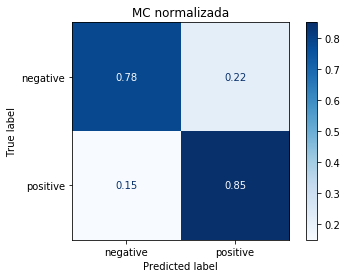

In [13]:
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(np.unique(data['airline_sentiment']))

Yest = clf.predict(X_test)

print(f"Accuracy = {accuracy_score(y_test,Yest)}")
print(f"Balanced Accuracy = {balanced_accuracy_score(y_test,Yest)}")

#Las métricas F1, precision and recall requieren que se establezca la convención de cuál es la clase positiva (1)
print(f"F1 = {f1_score(le.transform(y_test),le.transform(Yest))}")

disp = plot_confusion_matrix(clf, X_test, y_test, display_labels=np.unique(data['airline_sentiment']),
                             cmap=plt.cm.Blues, 
                             normalize='true')
disp.ax_.set_title('MC normalizada')
plt.show()

## Ejercicio 1.2

Diseñe un experimento para ajustar los hiper-parámetros de un modelo de Bagging de árboles de decisión. Ajuste el número de árboles y la profundida de cada árbol.

Tenga en cuenta que el GridSearch no puede modificar la profundida del árbol de decisión porque sólo puede acceder a los parámetros del estimador, que en este caso es un modelo de Bagging, la profundidad hace parte de los párametros del estimador base y no son accesibles por el GridSearch.

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

max_depth = [2,4,6,8]
parameters = {'n_estimators':[20,40,60,80,100]}
clf2 = []
for i in max_depth:
    
    clf_b = DecisionTreeClassifier(random_state=0, class_weight='balanced', max_depth=i)
    clf_bagging = BaggingClassifier(base_estimator=clf_b, random_state=0)
    clf2.append(GridSearchCV(estimator=clf_bagging, param_grid=parameters, cv=st, scoring='balanced_accuracy').fit(X_train,y_train))

best_score = 0
for i in range(len(max_depth)):
    if clf2[i].best_score_ >= best_score:
        best_score = clf2[i].best_score_
        ind = i
clf2 = clf2[ind]

In [15]:
clf2.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight='balanced',
                                                        criterion='gini',
                                                        max_depth=8,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=0,


Evalúe en las muestras de test. Estime Accuracy, Accuracy Balanceado y F1. Grafique la matriz de confusión.

Accuracy = 0.8614118666089217
Balanced Accuracy = 0.766105537822364
F1 = 0.6412556053811659


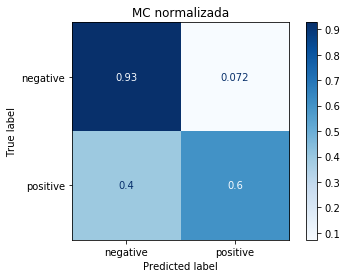

In [16]:
Yest = clf2.predict(X_test)

print(f"Accuracy = {accuracy_score(y_test,Yest)}")
print(f"Balanced Accuracy = {balanced_accuracy_score(y_test,Yest)}")

#Las métricas F1, precision and recall requieren que se establezca la convención de cuál es la clase positiva (1)
print(f"F1 = {f1_score(le.transform(y_test),le.transform(Yest))}")

disp = plot_confusion_matrix(clf2, X_test, y_test, display_labels=np.unique(data['airline_sentiment']),
                             cmap=plt.cm.Blues, 
                             normalize='true')
disp.ax_.set_title('MC normalizada')
plt.show()

In [20]:
clf2.best_estimator_.estimators_[0].feature_importances_

array([0.00233476, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

### Solución alternativa

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

parameters = {'n_estimators':[20,40,60,80,100],
             "base_estimator__max_depth": [2,4,6,8],}
clf_b = DecisionTreeClassifier(random_state=0, class_weight='balanced')
clf_bagging = BaggingClassifier(base_estimator=clf_b, random_state=0)
clf2 = GridSearchCV(estimator=clf_bagging, param_grid=parameters, cv=st, scoring='balanced_accuracy').fit(X_train,y_train)

In [16]:
clf2.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight='balanced',
                                                        criterion='gini',
                                                        max_depth=8,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=0,


## Ejercicio 1.3: Importancia de variables

Grafique la importancia de las variables de acuerdo con el mejor de los dos comités de máquina evaluados. Determine cuántas variables tienen importancia 0.

<BarContainer object of 2000 artists>

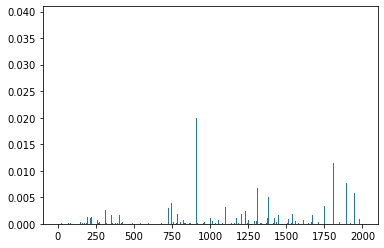

In [14]:
plt.bar(np.arange(2000),clf.best_estimator_.feature_importances_)

In [15]:
np.sum(clf.best_estimator_.feature_importances_==0)

949

¿Cuáles son las 10 palabras más determinantes para definir el sentimiento de los tweets? Incluya el código necesario para poder responder la pregunta.

In [16]:
indx = np.argsort(clf.best_estimator_.feature_importances_)[::-1]

In [17]:
indx[:10]

array([1735, 1732,  829,  892,  910,  734,  140,  307, 1950,  218])

In [18]:
for i in indx[:10]:
    print(list(count_vectorizer.vocabulary_.keys())[list(count_vectorizer.vocabulary_.values()).index(i)])

thanks
thank
great
hold
hours
flight
amazing
cancelled
wont
bag


In [21]:
list(count_vectorizer.vocabulary_.values())

[1337,
 1993,
 103,
 661,
 1418,
 624,
 125,
 144,
 1061,
 246,
 214,
 1742,
 1557,
 1294,
 41,
 734,
 1544,
 542,
 757,
 1880,
 1985,
 1205,
 1757,
 753,
 1950,
 207,
 140,
 172,
 909,
 598,
 1992,
 823,
 1096,
 1364,
 243,
 829,
 502,
 1745,
 39,
 1800,
 863,
 821,
 22,
 933,
 676,
 1600,
 1673,
 1789,
 1735,
 1534,
 1154,
 650,
 468,
 455,
 1027,
 1126,
 980,
 872,
 1743,
 1887,
 141,
 733,
 1236,
 1565,
 1922,
 793,
 1594,
 1541,
 1023,
 878,
 1007,
 208,
 1901,
 693,
 1759,
 318,
 202,
 1551,
 1088,
 705,
 271,
 839,
 1150,
 1543,
 781,
 805,
 775,
 966,
 1656,
 1123,
 1379,
 164,
 1924,
 302,
 611,
 1477,
 854,
 1866,
 763,
 1261,
 1531,
 1595,
 83,
 605,
 914,
 679,
 386,
 126,
 885,
 995,
 443,
 245,
 865,
 102,
 325,
 1156,
 266,
 1374,
 1034,
 660,
 921,
 1766,
 153,
 1232,
 1484,
 1311,
 1359,
 1873,
 1254,
 1260,
 1213,
 1645,
 746,
 618,
 1981,
 1913,
 241,
 128,
 849,
 349,
 1691,
 1956,
 1886,
 1587,
 884,
 754,
 864,
 858,
 809,
 95,
 1419,
 1496,
 1969,
 1164,
 939,
 1

Cree nueva versiones para los conjuntos Xtrain y Xtest, eliminando las variables que según el análisis anterior tienen importancia cero. Realice nuevamente el proceso de entrenamiento y validación.

In [141]:
X_train2 = X_train[:,clf.best_estimator_.feature_importances_!=0]

parameters = {'n_estimators':[20,40,60,80,100,120], 'max_depth':[2,4,6,8], 'max_features':[10,20,30,40,50]}
clf_b = RandomForestClassifier(random_state=0,class_weight='balanced_subsample')
clf3 = GridSearchCV(estimator=clf_b, param_grid=parameters, cv=st, scoring='balanced_accuracy')
clf3.fit(X_train2,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None),
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [10, 20, 30, 40, 50],
                         'n_estimators': [20, 40, 60, 80, 100, 120]},
             scoring='balanced_accuracy')

In [142]:
clf3.best_estimator_.n_estimators

120

Evalúe en las muestras de test. Estime Accuracy, Accuracy Balanceado y F1. Grafique la matriz de confusión. ¿Cambió el resultado?

Accuracy = 0.7916847119965353
Balanced Accuracy = 0.8077981133726688
F1 = 0.6215578284815106


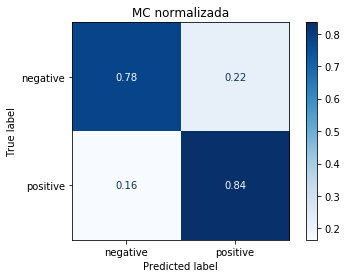

In [143]:
X_test2 = X_test[:,clf.best_estimator_.feature_importances_!=0]
Yest = clf3.predict(X_test2)

print(f"Accuracy = {accuracy_score(y_test,Yest)}")
print(f"Balanced Accuracy = {balanced_accuracy_score(y_test,Yest)}")

#Las métricas F1, precision and recall requieren que se establezca la convención de cuál es la clase positiva (1)
print(f"F1 = {f1_score(le.transform(y_test),le.transform(Yest))}")

disp = plot_confusion_matrix(clf3, X_test2, y_test, display_labels=np.unique(data['airline_sentiment']),
                             cmap=plt.cm.Blues, 
                             normalize='true')
disp.ax_.set_title('MC normalizada')
plt.show()

# Parte 2.

**tf-idf + Boosting**

## tf-idf representation

This stands for term frequency and inverse document frequency. The tf-idf weighting scheme assigns to term $t$ a weight in document $d$ given by

$$
\mbox{tf-idf}_{t,d} = \mbox{tf}_{t,d} \times \mbox{idf}_t.$$

**Term Frequency (tf)**: gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf.

$$\mbox{tf}_{t,d} = \frac{n_{t,d}}{\sum_k n_{k,d}} $$

**Inverse Data Frequency (idf)**: used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. It is given by the equation below.

$$\mbox{idf}_{t} = \log\left(\frac{N}{df_t}\right) + 1; \; df_t = \text{number of documents contaning } t $$

In other words, $\mbox{tf-idf}_{t,d}$ assigns to term $t$ a weight in document $d$ that is

- highest when $t$ occurs many times within a small number of documents (thus lending high discriminating power to those documents);
- lower when the term occurs fewer times in a document, or occurs in many documents (thus offering a less pronounced relevance signal);

- lowest when the term occurs in virtually all documents.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_features=2000,stop_words='english',
                                 use_idf=True) #ngram_range=(1,3)

%time tfidf_matrix = tfidf_vectorizer.fit_transform(data['text']) #fit the vectorizer to synopses

print(tfidf_matrix.shape)
print(tfidf_matrix)

CPU times: user 111 ms, sys: 2.33 ms, total: 113 ms
Wall time: 112 ms
(11541, 2000)
  (0, 661)	0.39367966365691553
  (0, 103)	0.591824806409575
  (0, 1993)	0.4912521788552613
  (0, 1337)	0.5034193259214481
  (1, 1061)	0.4695313866808273
  (1, 144)	0.3094125314529977
  (1, 125)	0.5385400398830689
  (1, 624)	0.5187164369706571
  (1, 1418)	0.35314592700558783
  (2, 1742)	0.5576573833773847
  (2, 214)	0.4634174987416282
  (2, 246)	0.5462077749306882
  (2, 1418)	0.4194276233511667
  (3, 1880)	0.44800146758106696
  (3, 757)	0.26545077257155125
  (3, 542)	0.27678258315191273
  (3, 1544)	0.2864825323709622
  (3, 734)	0.13096688472776288
  (3, 41)	0.304631887571051
  (3, 1294)	0.304631887571051
  (3, 1557)	0.3247018156756328
  (3, 1742)	0.34074273991952364
  (3, 214)	0.283159791217208
  (3, 1418)	0.25628086678069506
  (4, 207)	0.45423030614611987
  :	:
  (11538, 546)	0.553997328813931
  (11538, 825)	0.4055546357576335
  (11538, 1732)	0.3768143993159555
  (11538, 734)	0.2220002209501983
  (11539

De manera alternativa se puede hacer usando la clase TfidfTransformer a partir de la matrix de conteos previa:

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidf_matrix2 = tfidf_transformer.fit_transform(count_matrix) #fit the vectorizer to synopses

print(tfidf_matrix2.shape)
print(tfidf_matrix2)

(11541, 2000)
  (0, 1993)	0.4912521788552613
  (0, 1337)	0.5034193259214481
  (0, 661)	0.39367966365691553
  (0, 103)	0.591824806409575
  (1, 1418)	0.35314592700558783
  (1, 1061)	0.4695313866808273
  (1, 624)	0.5187164369706571
  (1, 144)	0.3094125314529977
  (1, 125)	0.5385400398830689
  (2, 1742)	0.5576573833773847
  (2, 1418)	0.4194276233511667
  (2, 246)	0.5462077749306882
  (2, 214)	0.4634174987416282
  (3, 1880)	0.44800146758106696
  (3, 1742)	0.34074273991952364
  (3, 1557)	0.3247018156756328
  (3, 1544)	0.2864825323709622
  (3, 1418)	0.25628086678069506
  (3, 1294)	0.304631887571051
  (3, 757)	0.26545077257155125
  (3, 734)	0.13096688472776288
  (3, 542)	0.27678258315191273
  (3, 214)	0.283159791217208
  (3, 41)	0.304631887571051
  (4, 1985)	0.37311237553662946
  :	:
  (11538, 825)	0.4055546357576335
  (11538, 734)	0.2220002209501983
  (11538, 546)	0.553997328813931
  (11538, 358)	0.5808090972503284
  (11539, 1737)	0.2190194888688831
  (11539, 1697)	0.31526712564235654
  (1153

## Ejercicio 2.1: Clasificación usando estrategias de Boosting

Realice la partición de los datos entre Entrenamiento y Test. Recuerde que Test es el subconjunto que dejará pára medir el desempeño del sistema después del entrenamiento y de la selección de los hiperparámetros. 

Teniendo en cuenta la distribución de clases, seleccione correctamente la estrategia de particionamiento.

In [160]:
#Complete el código
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data['airline_sentiment'], test_size=0.2, random_state=42, stratify=data['airline_sentiment'])

st = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

Diseñe un experimento para ajustar los hiper-parámetros de un modelo Gradient Boosting Tree. Ajuste el número de árboles, la profundida de cada árbol y el número de variables a analizar por nodo.

In [161]:
from sklearn.ensemble import GradientBoostingClassifier

clf_b = GradientBoostingClassifier(random_state=0)

parameters = {'n_estimators':[20,40,60,80,100,120,140], 'max_depth':[2,4,6,8], 'max_features':[10,20,30,40,50]}

clf = GridSearchCV(estimator=clf_b, param_grid=parameters, cv=st, scoring='balanced_accuracy')

In [162]:
clf.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None),
             estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [10, 20, 30, 40, 50],
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140]},
             scoring='balanced_accuracy')

In [163]:
clf.best_estimator_.n_estimators

140

Accuracy = 0.8904287570376787
Balanced Accuracy = 0.7827822225907042
F1 = 0.6918392204628503


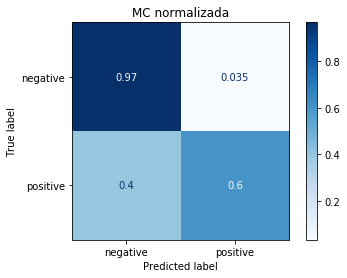

In [164]:
Yest = clf.predict(X_test)

print(f"Accuracy = {accuracy_score(y_test,Yest)}")
print(f"Balanced Accuracy = {balanced_accuracy_score(y_test,Yest)}")

#Las métricas F1, precision and recall requieren que se establezca la convención de cuál es la clase positiva (1)
print(f"F1 = {f1_score(le.transform(y_test),le.transform(Yest))}")

disp = plot_confusion_matrix(clf, X_test, y_test, display_labels=np.unique(data['airline_sentiment']),
                             cmap=plt.cm.Blues, 
                             normalize='true')
disp.ax_.set_title('MC normalizada')
plt.show()

## Ejercicio 2.2: 

Modifique el experimento anterior para ajustar los hiper-parámetros de un modelo **Stochastic** Gradient Boosting Tree. Ajuste el número de árboles, la profundida de cada árbol y el número de variables a analizar por nodo. Use un parámetro subsample = 0.9.

In [165]:
clf_b = GradientBoostingClassifier(random_state=0, subsample = 0.9)

parameters = {'n_estimators':[20,40,60,80,100,120,140], 'max_depth':[2,4,6,8], 'max_features':[10,20,30,40,50]}

clf2 = GridSearchCV(estimator=clf_b, param_grid=parameters, cv=st, scoring='balanced_accuracy')
clf2.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None),
             estimator=GradientBoostingClassifier(random_state=0,
                                                  subsample=0.9),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [10, 20, 30, 40, 50],
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140]},
             scoring='balanced_accuracy')

In [166]:
clf2.best_estimator_

GradientBoostingClassifier(max_depth=8, max_features=40, n_estimators=140,
                           random_state=0, subsample=0.9)

Evalúe en las muestras de test. Estime: Accuracy, Accuracy Balanceado y F1. Grafique la matriz de confusión normalizada.

Accuracy = 0.887830229536596
Balanced Accuracy = 0.7787939817693579
F1 = 0.6845310596833131


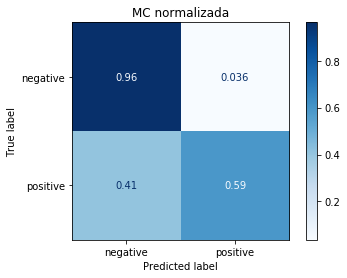

In [167]:
Yest = clf2.predict(X_test)

print(f"Accuracy = {accuracy_score(y_test,Yest)}")
print(f"Balanced Accuracy = {balanced_accuracy_score(y_test,Yest)}")

#Las métricas F1, precision and recall requieren que se establezca la convención de cuál es la clase positiva (1)
print(f"F1 = {f1_score(le.transform(y_test),le.transform(Yest))}")

disp = plot_confusion_matrix(clf2, X_test, y_test, display_labels=np.unique(data['airline_sentiment']),
                             cmap=plt.cm.Blues, 
                             normalize='true')
disp.ax_.set_title('MC normalizada')
plt.show()

## Ejercicio 2.2

Determine las 10 palabras más importantes para la clasificación de acuerdo con el mejor modelo de la parte 2.

In [168]:
indx = np.argsort(clf.best_estimator_.feature_importances_)[::-1]

In [175]:
for i in indx[:10]:
    print(list(tfidf_vectorizer.vocabulary_.keys())[list(tfidf_vectorizer.vocabulary_.values()).index(i)])

thanks
thank
great
awesome
love
amazing
best
flight
hours
hold


## *Ejercicio 3: XGBoost

Se recomienda revisar la documentación oficial [link](https://xgboost.readthedocs.io/en/latest/index.html)

In [211]:
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight

In [212]:
class_weight = compute_class_weight('balanced',le.classes_,y_train)

In [213]:
class_weight

array([0.62871152, 2.44232804])

In [220]:
param = {'n_estimators':[20,40,60,80,100,120,140],'max_depth': [2,4,6,8], 'learning_rate':[1,0.5,0.1], 'reg_lambda':[0.1,0.2]}
clf_b = xgb.XGBClassifier(scale_pos_weight=class_weight[1]/class_weight[0],random_state = 0, objective='binary:logistic')

In [222]:
clf3 = GridSearchCV(estimator=clf_b, param_grid=param, cv=st, scoring='balanced_accuracy')
clf3.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None),
             estimator=XGBClassifier(scale_pos_weight=3.8846560846560845),
             param_grid={'learning_rate': [1, 0.5, 0.1],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140],
                         'reg_lambda': [0.1, 0.2]},
             scoring='balanced_accuracy')

In [223]:
clf3.best_estimator_

XGBClassifier(learning_rate=0.5, max_depth=8, n_estimators=140, reg_lambda=0.2,
              scale_pos_weight=3.8846560846560845)

Accuracy = 0.8830662624512776
Balanced Accuracy = 0.8472107071628275
F1 = 0.7337278106508877


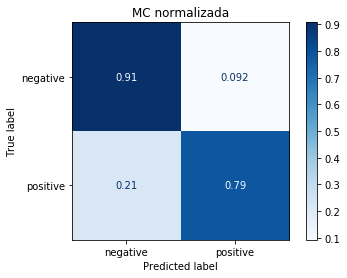

In [224]:
Yest = clf3.predict(X_test)

print(f"Accuracy = {accuracy_score(y_test,Yest)}")
print(f"Balanced Accuracy = {balanced_accuracy_score(y_test,Yest)}")

#Las métricas F1, precision and recall requieren que se establezca la convención de cuál es la clase positiva (1)
print(f"F1 = {f1_score(le.transform(y_test),le.transform(Yest))}")

disp = plot_confusion_matrix(clf3, X_test, y_test, display_labels=np.unique(data['airline_sentiment']),
                             cmap=plt.cm.Blues, 
                             normalize='true')
disp.ax_.set_title('MC normalizada')
plt.show()

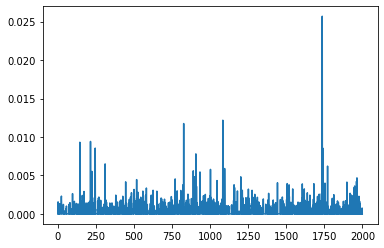

In [227]:
plt.plot(clf3.best_estimator_.feature_importances_)

In [228]:
np.sum(clf3.best_estimator_.feature_importances_==0)

1247

In [229]:
indx = np.argsort(clf3.best_estimator_.feature_importances_)[::-1]
for i in indx[:10]:
    print(list(tfidf_vectorizer.vocabulary_.keys())[list(tfidf_vectorizer.vocabulary_.values()).index(i)])

thank
love
great
awesome
amazing
thanks
best
hours
cancelled
told


Sin el wrapper...

In [199]:
X_train_mat = xgb.DMatrix(X_train, label=le.transform(y_train))
X_test_mat = xgb.DMatrix(X_test, label=le.transform(y_test))

param = {'max_depth': 6, 'eta': 0.1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'
param['verbosity'] = 0

evallist = [(X_test_mat, 'eval'), (X_train_mat, 'train')]

num_round = 100
bst = xgb.train(param, X_train_mat, num_round, evallist)

[0]	eval-auc:0.752647	train-auc:0.76766
[1]	eval-auc:0.763506	train-auc:0.780277
[2]	eval-auc:0.764168	train-auc:0.780838
[3]	eval-auc:0.76415	train-auc:0.780835
[4]	eval-auc:0.76696	train-auc:0.784821
[5]	eval-auc:0.767063	train-auc:0.784968
[6]	eval-auc:0.77862	train-auc:0.79607
[7]	eval-auc:0.778844	train-auc:0.796336
[8]	eval-auc:0.783783	train-auc:0.801997
[9]	eval-auc:0.785227	train-auc:0.802326
[10]	eval-auc:0.785104	train-auc:0.802719
[11]	eval-auc:0.796629	train-auc:0.817769
[12]	eval-auc:0.801545	train-auc:0.821828
[13]	eval-auc:0.804243	train-auc:0.826232
[14]	eval-auc:0.812265	train-auc:0.836149
[15]	eval-auc:0.828472	train-auc:0.856628
[16]	eval-auc:0.82759	train-auc:0.859427
[17]	eval-auc:0.830593	train-auc:0.862983
[18]	eval-auc:0.830829	train-auc:0.863637
[19]	eval-auc:0.831358	train-auc:0.864243
[20]	eval-auc:0.840387	train-auc:0.875469
[21]	eval-auc:0.841018	train-auc:0.876043
[22]	eval-auc:0.841597	train-auc:0.876665
[23]	eval-auc:0.843624	train-auc:0.878877
[24]	eva

Accuracy = 0.8796015591165006
Balanced Accuracy = 0.7571399125776691
F1 = 0.6516290726817043


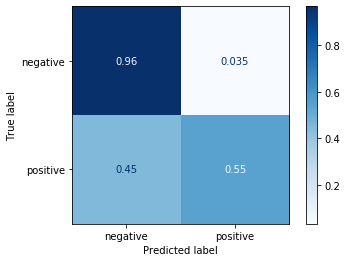

In [200]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
Yest = np.round(bst.predict(X_test_mat))

print(f"Accuracy = {accuracy_score(le.transform(y_test),Yest)}")
print(f"Balanced Accuracy = {balanced_accuracy_score(le.transform(y_test),Yest)}")

cm = confusion_matrix(le.transform(y_test),Yest,normalize='true')

#Las métricas F1, precision and recall requieren que se establezca la convención de cuál es la clase positiva (1)
print(f"F1 = {f1_score(le.transform(y_test),Yest)}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)
disp.plot(include_values=True,cmap=plt.cm.Blues, ax=None, xticks_rotation='horizontal',
          values_format=None)
plt.show()

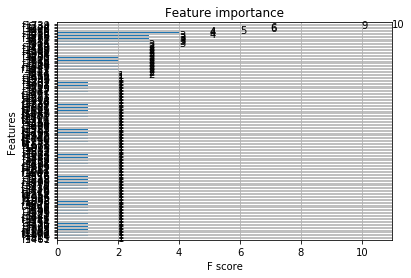

In [187]:
xgb.plot_importance(bst)